In [ ]:
#!pip install neupy
#!pip install neurolab
import matplotlib.pyplot as plt 
import numpy.matlib
import numpy as np
from neupy import algorithms
import random
from neurolab.train import train_cg
import neurolab as nl


задаем обучающее множество

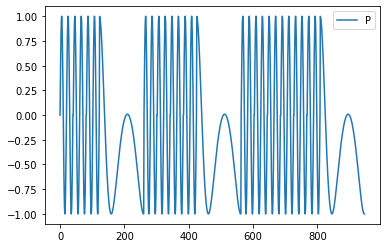

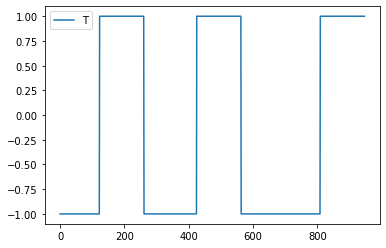

In [ ]:
#основа
k1 = np.arange(0, 1+0.025, 0.025)
p = np.sin(4*np.pi*k1)
t1 = np.full(len(p),-1)

#для распознавания
k2 = np.arange(2.84, 6.25+0.025, 0.025)
g = np.sin(k2**2-10*k2+3)
t2 = np.full(len(g), 1)

R = [3,4,6]

P = np.array(np.append(np.append(np.append(np.append(np.append(np.matlib.repmat(p,1,R[0]), g), np.matlib.repmat(p,1,R[1])),g),np.matlib.repmat(p,1,R[2])),g),ndmin=2).reshape(-1,1)
T = np.array(np.append(np.append(np.append(np.append(np.append(np.matlib.repmat(t1,1,R[0]), t2), np.matlib.repmat(t1,1,R[1])),t2),np.matlib.repmat(t1,1,R[2])),t2),ndmin=2).reshape(-1,1)

plt.plot(P.reshape(len(P)))
plt.legend(['P'])
plt.show()
plt.plot(T.reshape(len(T)))
plt.legend(['T'])
plt.show()

сеть Элмана

In [ ]:
net = nl.net.newelm([[-1, 1]], [10, 1], [nl.trans.TanSig(), nl.trans.TanSig()])

net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
error = net.train(P, T, epochs=150, show=20)


Epoch: 20; Error: 0.8772070036004753;
Epoch: 40; Error: 0.879031060642145;
Epoch: 60; Error: 1.4661401453021141;
Epoch: 80; Error: 0.39901517245601203;
Epoch: 100; Error: 0.36118602742429495;
Epoch: 120; Error: 0.3651576561181756;
Epoch: 140; Error: 0.359587280719565;
The maximum number of train epochs is reached


выход сети

In [ ]:
output = net.sim(P)

графики

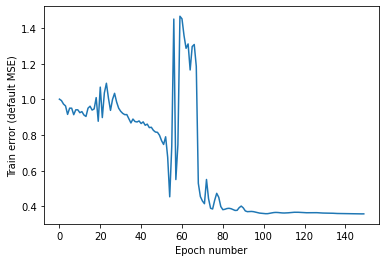

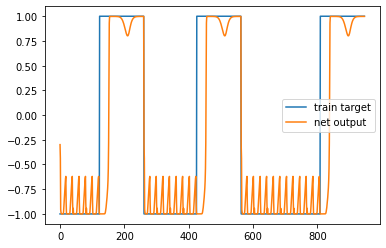

In [ ]:
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error (default MSE)')
plt.show()

plt.plot(T.reshape(len(T)))
plt.plot(output.reshape(len(output)))
plt.legend(['train target', 'net output'])
plt.show()

преобразуем выход в {-1, 1} и посчитаем точность

In [ ]:
out = [1 if(i>=0) else -1 for i in output]
print('final accuracy = {}'.format((out == T.reshape(len(output))).mean()))

final accuracy = 0.9081309398099261


сеть Хопфилда

задаем образы 2 3 4

In [ ]:
def print_im(mat):
  mat= mat.reshape((12,10))
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      if mat[i,j] == 1:
        print('* ',end='')
      else:
        print('  ',end='')
    print()
  print('\n')

m2 = np.array([
                1,1,1,1,1,1,1,1,0,0,
                1,1,1,1,1,1,1,1,0,0,
                0,0,0,0,0,0,1,1,0,0,
                0,0,0,0,0,0,1,1,0,0,
                0,0,0,0,0,0,1,1,0,0,
                1,1,1,1,1,1,1,1,0,0,
                1,1,1,1,1,1,1,1,0,0,
                1,1,0,0,0,0,0,0,0,0,
                1,1,0,0,0,0,0,0,0,0,
                1,1,0,0,0,0,0,0,0,0,
                1,1,1,1,1,1,1,1,0,0,
                1,1,1,1,1,1,1,1,0,0
], ndmin=2)
print_im(m2)

m3 = np.array([
                0,0,1,1,1,1,1,1,0,0,
                0,0,1,1,1,1,1,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,1,1,1,1,0,0,
                0,0,0,0,1,1,1,1,0,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,1,1,1,1,1,1,1,0,
                0,0,1,1,1,1,1,1,0,0
], ndmin=2)
print_im(m3)

m4 = np.array([
                0,1,1,0,0,0,0,1,1,0,
                0,1,1,0,0,0,0,1,1,0,
                0,1,1,0,0,0,0,1,1,0,
                0,1,1,0,0,0,0,1,1,0,
                0,1,1,0,0,0,0,1,1,0,
                0,1,1,1,1,1,1,1,1,0,
                0,1,1,1,1,1,1,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0,
                0,0,0,0,0,0,0,1,1,0
], ndmin=2)
print_im(m4)

* * * * * * * *     
* * * * * * * *     
            * *     
            * *     
            * *     
* * * * * * * *     
* * * * * * * *     
* *                 
* *                 
* *                 
* * * * * * * *     
* * * * * * * *     


    * * * * * *     
    * * * * * * *   
              * *   
              * *   
              * *   
        * * * *     
        * * * *     
              * *   
              * *   
              * *   
    * * * * * * *   
    * * * * * *     


  * *         * *   
  * *         * *   
  * *         * *   
  * *         * *   
  * *         * *   
  * * * * * * * *   
  * * * * * * * *   
              * *   
              * *   
              * *   
              * *   
              * *   




объединяем изображения и обучаем сеть

In [ ]:
data = np.concatenate([m2, m3, m4], axis=0)
dhn = algorithms.DiscreteHopfieldNetwork(mode='sync', n_times=400)
dhn.train(data)

проверим распознавание образа

In [ ]:
pred = dhn.predict(m2)
print_im(pred)

* * * * * * * *     
* * * * * * * *     
            * *     
            * *     
            * *     
* * * * * * * *     
* * * * * * * *     
* *                 
* *                 
* *                 
* * * * * * * *     
* * * * * * * *     




зададим зашумление тройки в 20%

In [ ]:
m3_noise = m3.copy()
for i in range(len(m3_noise[0])): 
  if random.random() > 0.8:
    m3_noise[0, i] = abs(m3_noise[0, i]-1)
print_im(m3_noise)

    *   * * * *     
  * * * * * * * *   
            * * *   
  *   *         *   
        *     * *   
        * * * * *   
    *   *   * *     
*           * * *   
          *   *     
          *     *   
    * * * * * *     
      * * * * * *   




результат распознавания

In [ ]:
pred = dhn.predict(m3_noise)
print_im(pred)

    * * * * * *     
    * * * * * * *   
              * *   
              * *   
              * *   
        * * * *     
        * * * *     
              * *   
              * *   
              * *   
    * * * * * * *   
    * * * * * *     




задаим зашумление четверки в 30%

In [ ]:
m4_noise = m4.copy()
for i in range(len(m4_noise[0])): 
  if random.random() > 0.7:
    m4_noise[0, i] = abs(m4_noise[0, i]-1)
print_im(m4_noise)

*   *         * * * 
    *         * * * 
* * *   *     *   * 
*             * * * 
  * *   *     *   * 
  *     * * * *     
  * *   * * * * *   
    *       * *   * 
*               * * 
  *       *   * * * 
      *     * *     
*           * * *   




результат распознавания

In [ ]:
pred = dhn.predict(m4_noise)
print_im(pred)

  * *         * *   
  * *         * *   
  * *         * *   
  * *         * *   
  * *         * *   
  * * * * * * * *   
  * * * * * * * *   
              * *   
              * *   
              * *   
              * *   
              * *   




сеть Хэмминга

In [ ]:
m2 = np.array([
                1,1,1,1,1,1,1,1,-1,-1,
                1,1,1,1,1,1,1,1,-1,-1,
                -1,-1,-1,-1,-1,-1,1,1,-1,-1,
                -1,-1,-1,-1,-1,-1,1,1,-1,-1,
                -1,-1,-1,-1,-1,-1,1,1,-1,-1,
                1,1,1,1,1,1,1,1,-1,-1,
                1,1,1,1,1,1,1,1,-1,-1,
                1,1,-1,-1,-1,-1,-1,-1,-1,-1,
                1,1,-1,-1,-1,-1,-1,-1,-1,-1,
                1,1,-1,-1,-1,-1,-1,-1,-1,-1,
                1,1,1,1,1,1,1,1,-1,-1,
                1,1,1,1,1,1,1,1,-1,-1
])
m3 = np.array([
                -1,-1,1,1,1,1,1,1,-1,-1,
                -1,-1,1,1,1,1,1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,1,1,1,1,-1,-1,
                -1,-1,-1,-1,1,1,1,1,-1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,1,1,1,1,1,1,1,-1,
                -1,-1,1,1,1,1,1,1,-1,-1
])

m4 = np.array([
                -1,1,1,-1,-1,-1,-1,1,1,-1,
                -1,1,1,-1,-1,-1,-1,1,1,-1,
                -1,1,1,-1,-1,-1,-1,1,1,-1,
                -1,1,1,-1,-1,-1,-1,1,1,-1,
                -1,1,1,-1,-1,-1,-1,1,1,-1,
                -1,1,1,1,1,1,1,1,1,-1,
                -1,1,1,1,1,1,1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1,
                -1,-1,-1,-1,-1,-1,-1,1,1,-1
])

Q = 3
patterns = np.array([m2, m3, m4])
nums = [2, 3, 4]
eps = 1 / (Q - 1)

shape = 10 * 12

IW = np.array([m2.T, m3.T, m4.T])
b = shape * np.ones((Q, 1))

a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ patterns[i] + b[i]
    
LW = np.eye(Q)
LW[LW == 0.0] = -eps
network = nl.net.newhop(a, max_init=600)

network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0
A = IW @ m2 + b
res = network.sim(A)

предсказываем двойку

In [ ]:
print(res[0])
answ = np.argmax(res[0])
print('this is: {}'.format(nums[answ]))

[ 1. -1. -1.]
this is: 2


зашумляем тройку на 20%

In [ ]:
m3_noise = m3.copy()
for i in range(len(m3_noise)): 
  if random.random() > 0.8:
    m3_noise[i] *= -1
A = IW @ m3_noise + b
res = network.sim(A)
print(res[0])
answ = np.argmax(res[0])
print('this is: {}'.format(nums[answ]))

[-1.  1. -1.]
this is: 3


зашумляем четверку на 30%

In [ ]:
m4_noise = m4.copy()
for i in range(len(m4_noise)): 
  if random.random() > 0.8:
    m4_noise[i] *= -1
A = IW @ m4_noise + b
res = network.sim(A)
print(res[0])
answ = np.argmax(res[0])
print('this is: {}'.format(nums[answ]))

[-1. -1.  1.]
this is: 4
